In [3]:
import pandas as pd
import numpy as np
import re

calendarDF=pd.read_csv("ny_calendar_2018.csv.gz")

#replace NaN values with 0
calendarDF.fillna(0, inplace=True)
calendarDF = calendarDF[calendarDF.price != 0]

#finding prices
price = calendarDF['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
#replace the price column with the new column
calendarDF['price']=prices

calendarDF = calendarDF[calendarDF.price >= 0]

#separating date column into day month and year
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.tail()

,listing_id,date,available,price,Year,Month,Day
17905409,30558114,2019-01-05,t,44.0,2019,01,05
17905410,30558114,2019-01-04,t,42.0,2019,01,04
17905411,30558114,2019-01-03,t,42.0,2019,01,03
17905412,30558114,2019-01-02,t,45.0,2019,01,02
17905413,30558114,2019-01-01,t,44.0,2019,01,01


In [4]:
yearDF=calendarDF.groupby(['Year','Month']).price.mean()
yearDF=yearDF.reset_index()
yearDF=yearDF.rename(columns={'price':'average_Price'})
yearDF['year-Month']=yearDF['Year'].map(str) + "-" + yearDF['Month'].map(str)
yearDF.to_csv('year_month_data.csv')
yearDF.head()

,Year,Month,average_Price,year-Month
0,2018,12,184.354991,2018-12
1,2019,01,157.704874,2019-01
2,2019,02,156.517736,2019-02
3,2019,03,170.179775,2019-03
4,2019,04,177.214098,2019-04


Text(0, 0.5, 'Average Price')

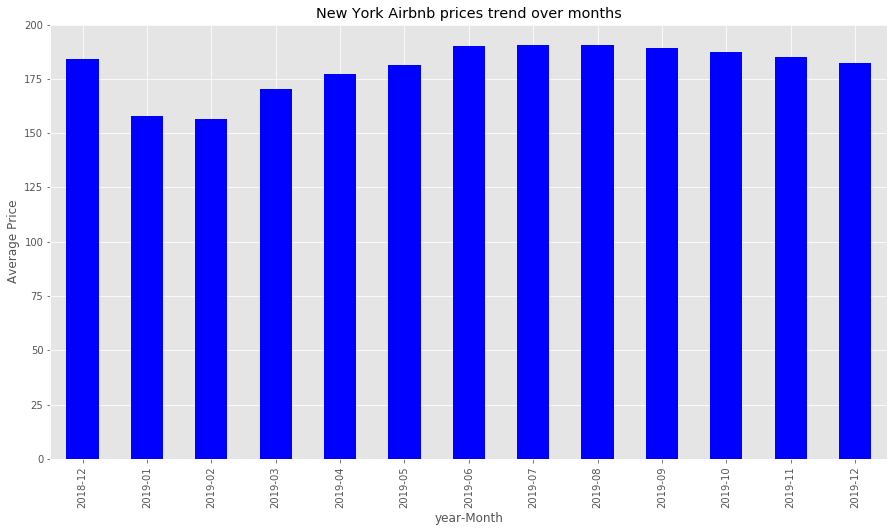

In [13]:
# visualizing the trend of year/Month and average prices of the listing

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

objects = yearDF['year-Month']
y_pos = yearDF['average_Price']

yearDF.plot(kind='bar', 
           x='year-Month',
           y='average_Price',
           color = 'b', 
           figsize =(15,8), 
           title = 'New York Airbnb prices trend over months', 
           legend = False)
plt.ylabel('Average Price')